In [1]:
import sys

In [2]:
sys.path.append('../src')

In [3]:
from data_loader import load_all_data

In [6]:
RAW_DATA_PATH = '../data/raw'
all_data_df = load_all_data(RAW_DATA_PATH)
all_data_df.head(20)

Found 15 CSV files to load.
Successfully created multi-index DataFrame.

No missing values found.


Open     High  \
Date                      Ticker                                                
2022-01-02 18:30:00+00:00 Adani Enterprises                  1713.00  1733.00   
                          Adani Ports & SEZ                   732.00   738.65   
                          Adani Power                         100.15   103.90   
                          Axis Bank                           680.25   698.50   
                          DLF                                 392.00   397.75   
                          Hindalco Industries                 475.55   479.95   
                          ICICI Bank                          743.05   766.00   
                          Larsen & Toubro                    1895.00  1937.45   
                          Power Finance Corporation            96.00    98.60   
                          Punjab National Bank                 37.30    38.15   
                          Rural Electrification Corporation   100.80   101.89   
                          State Bank of India                 462.00   472.00   
                          Tata Motors                         493.50   500.85   
                          Tata Steel                          111.50   115.10   
                          Vedanta                             341.00   355.00   
2022-01-03 18:30:00+00:00 Adani Enterprises                  1725.75  1728.00   
                          Adani Ports & SEZ                   743.00   747.00   
                          Adani Power                         102.50   103.55   
                          Axis Bank                           701.00   711.05   
                          DLF                                 396.30   400.50   

                                                                 Low    Close  \
Date                      Ticker                                                
2022-01-02 18:30:00+00:00 Adani Enterprises                  1711.20  1717.15   
                          Adani Ports & SEZ                   730.50   736.60   
                          Adani Power                         100.10   101.30   
                          Axis Bank                           679.00   696.35   
                          DLF                                 390.50   394.75   
                          Hindalco Industries                 472.10   478.05   
                          ICICI Bank                          743.00   764.70   
                          Larsen & Toubro                    1893.65  1922.85   
                          Power Finance Corporation            95.80    98.24   
                          Punjab National Bank                 37.25    38.00   
                          Rural Electrification Corporation    99.98   101.48   
                          State Bank of India                 460.10   470.80   
                          Tata Motors                         492.00   497.60   
                          Tata Steel                          111.50   114.24   
                          Vedanta                             340.45   353.80   
2022-01-03 18:30:00+00:00 Adani Enterprises                  1700.00  1719.00   
                          Adani Ports & SEZ                   732.65   739.25   
                          Adani Power                         100.10   100.55   
                          Axis Bank                           700.05   709.15   
                          DLF                                 390.70   394.45   

                                                             % Change  \
Date                      Ticker                                        
2022-01-02 18:30:00+00:00 Adani Enterprises                      0.45   
                          Adani Ports & SEZ                      0.86   
                          Adani Power                            1.60   
                          Axis Bank                              2.62   
                          DLF                               

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8) 

In [19]:
tickers_to_plot = ['Axis Bank', 'ICICI Bank', 'State Bank of India']

In [20]:
adj_close_df = all_data_df['Close'].unstack()

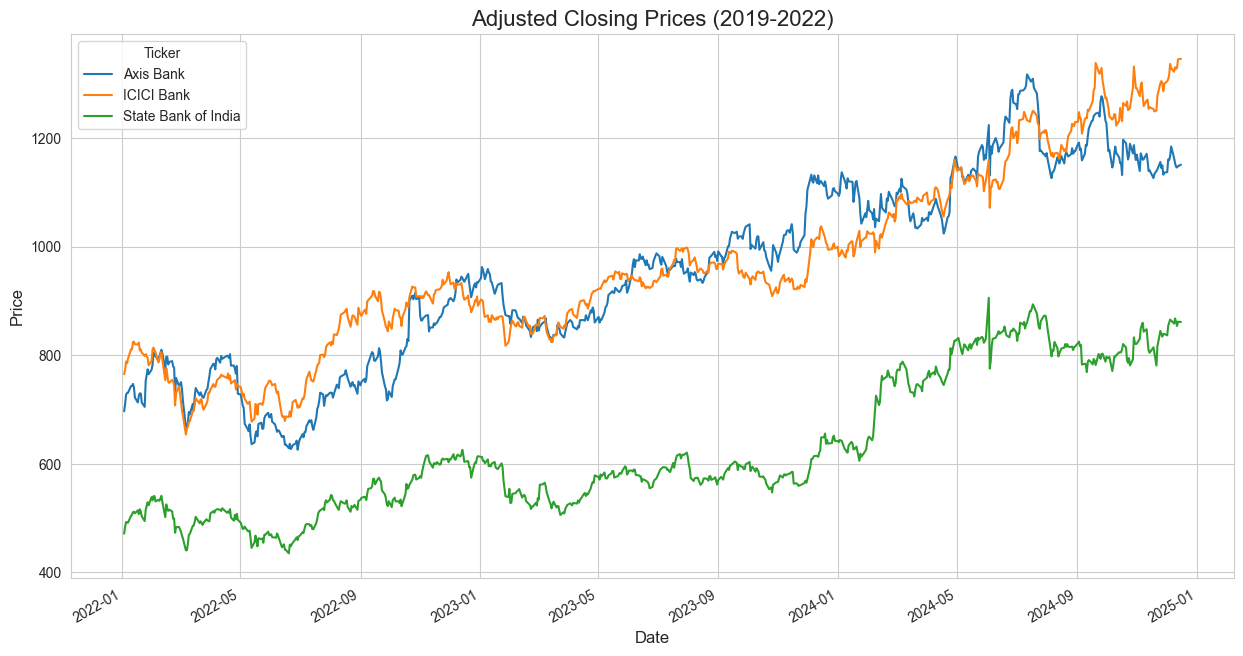

In [22]:
adj_close_df[tickers_to_plot].plot()
plt.title('Adjusted Closing Prices (2019-2022)', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Ticker')
plt.grid(True)
plt.show()


In [23]:
all_data_df['daily_return'] = all_data_df.groupby('Ticker')['Close'].pct_change()

In [24]:
ticker_to_analyze = 'Axis Bank'
single_ticker_returns = all_data_df.loc[(slice(None), ticker_to_analyze), 'daily_return']

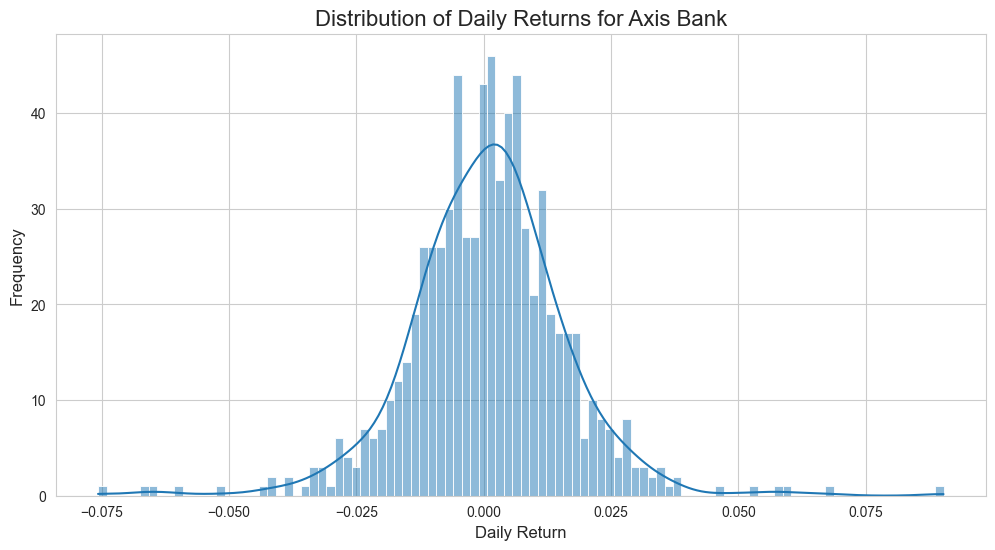

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(single_ticker_returns, bins=100, kde=True)
plt.title(f'Distribution of Daily Returns for {ticker_to_analyze}', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

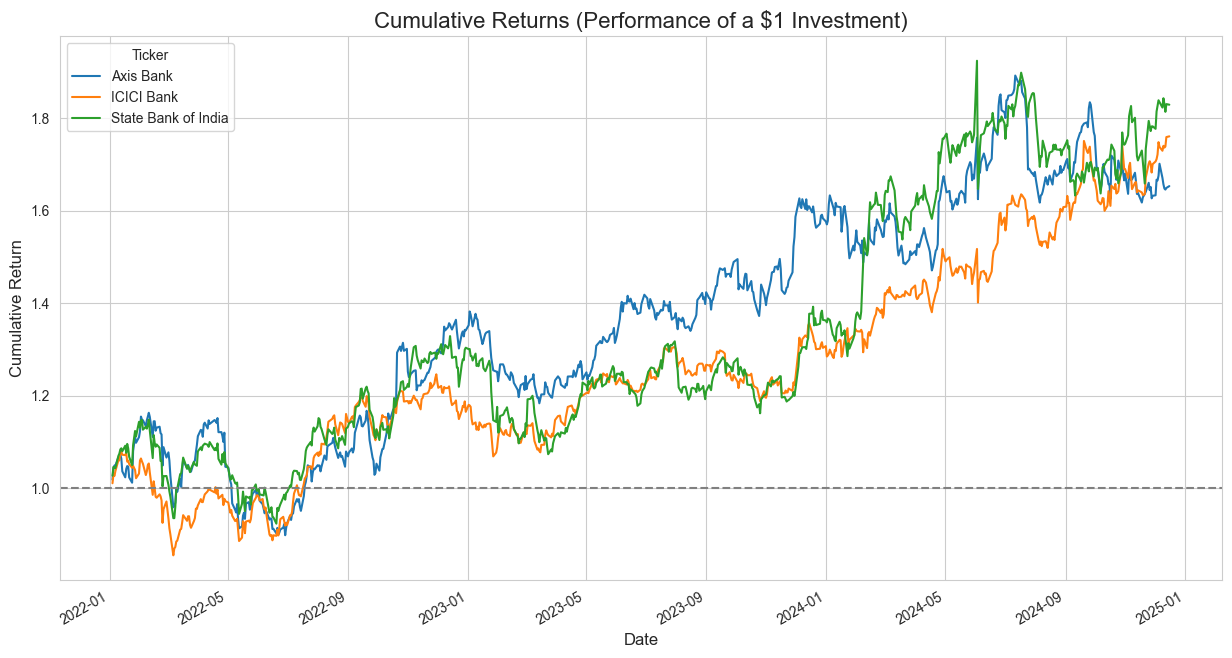

In [27]:

# This shows how an initial $1 investment would have grown over time.
cumulative_returns = (1 + all_data_df['daily_return']).groupby(level='Ticker').cumprod()

# Reshape for plotting
cumulative_returns_df = cumulative_returns.unstack(level='Ticker')

# Plot the same tickers we used for the price plot
cumulative_returns_df[tickers_to_plot].plot(figsize=(15, 8))
plt.title('Cumulative Returns (Performance of a $1 Investment)', fontsize=16)
plt.ylabel('Cumulative Return', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Ticker')
plt.grid(True)
plt.axhline(1, color='grey', linestyle='--') # Add a line at 1.0 for reference
plt.show()


## Volatility

High volatility → Price moves up and down a lot in a short period.

Low volatility → Price changes are small and more stable.

*Most commonly, volatility is measured using standard deviation of returns*

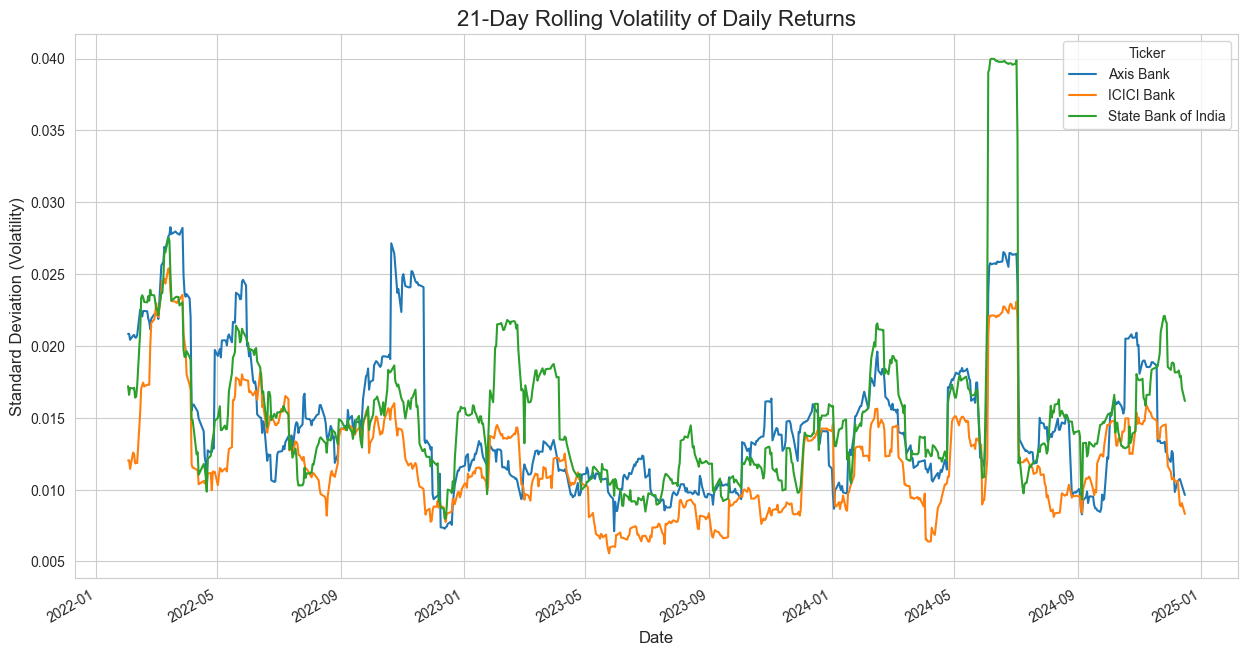

In [ ]:
rolling_window = 21
rolling_volatility = all_data_df['daily_return'].groupby('Ticker').rolling(window=rolling_window).std()


all_data_df['volatility'] = rolling_volatility.reset_index(level=0, drop=True)


volatility_df = all_data_df['volatility'].unstack()

volatility_df[tickers_to_plot].plot(figsize=(15, 8))

plt.title(f'{rolling_window}-Day Rolling Volatility of Daily Returns', fontsize=16)
plt.ylabel('Standard Deviation (Volatility)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Ticker')
plt.grid(True)
plt.show()

In [29]:
print(all_data_df['volatility'])

Date                       Ticker                           
2022-01-02 18:30:00+00:00  Adani Enterprises                         NaN
                           Adani Ports & SEZ                         NaN
                           Adani Power                               NaN
                           Axis Bank                                 NaN
                           DLF                                       NaN
                                                                  ...   
2024-12-15 18:30:00+00:00  Rural Electrification Corporation    0.018029
                           State Bank of India                  0.016169
                           Tata Motors                          0.013828
                           Tata Steel                           0.009545
                           Vedanta                              0.017023
Name: volatility, Length: 10995, dtype: float64
